In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import f_regression, mutual_info_regression

In [2]:
# Carga de datos.
np.random.seed(42)
X = np.random.rand(1000, 3) # mil muestras con 3 variables aleatorias
print(X)
print(np.shape(X))

[[0.37454012 0.95071431 0.73199394]
 [0.59865848 0.15601864 0.15599452]
 [0.05808361 0.86617615 0.60111501]
 ...
 [0.80000348 0.55270708 0.39655368]
 [0.13171503 0.86529576 0.15727321]
 [0.30978786 0.29004553 0.87141403]]
(1000, 3)


In [3]:
# Definimos la etiqueta (target, ground truth) haciéndola dependiente de las características x1 y x2
y = X[:, 0] + np.sin(6 * np.pi * X[:, 1]) + 0.1 * np.random.randn(1000)
# valor del primer atributo + una modificacion basada en una funcion sinosoidal no lineal + ruido aleatorio

In [4]:
# Evaluación de atributos: F-Test.
f_test, _ = f_regression(X, y) # Llamamos al estadístico F -- SOLO LINEAL
f_test /= np.max(f_test) # Normalizamos

In [5]:
# Evaluación de atributos: información mutua.
mi = mutual_info_regression(X, y) # Acepta conrrelaciones NO LINEALES
mi /= np.max(mi)

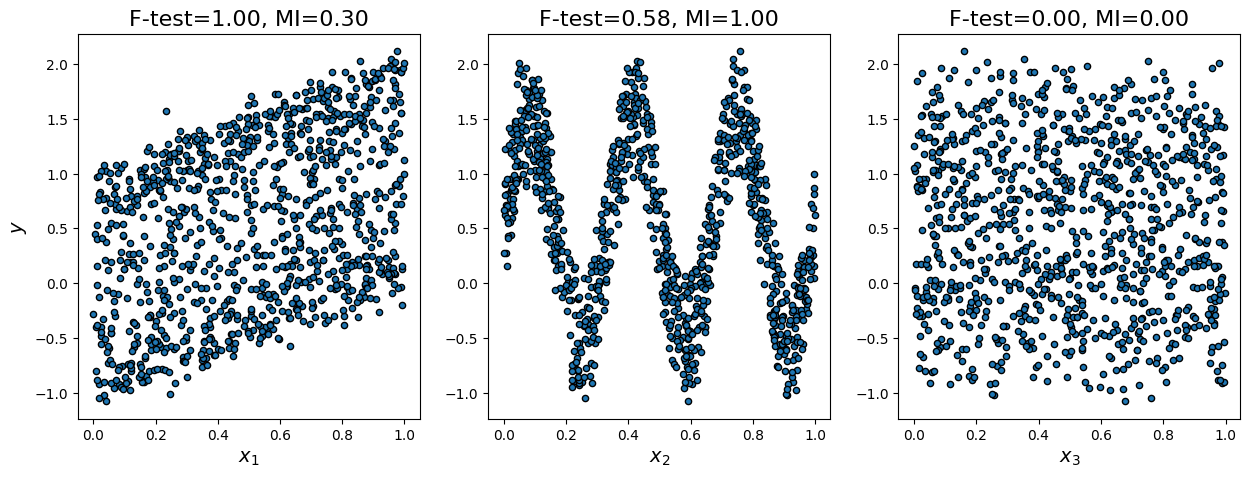

In [6]:
# Graficamos la distribución de los datos y evaluación de atributos.
plt.figure(figsize=(15, 5))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.scatter(X[:, i], y, edgecolor='black', s=20)
    plt.xlabel("$x_{}$".format(i + 1), fontsize=14)
    if i == 0:
        plt.ylabel("$y$", fontsize=14)
    plt.title("F-test={:.2f}, MI={:.2f}".format(f_test[i],
              mi[i]), fontsize=16)
plt.show()